###### Mise en situation
Vous êtes Data Analyst d'une grande chaîne de librairie, fraîchement embauché depuis une semaine ! Vous avez fait connaissance avec vos collègues, votre nouveau bureau, mais surtout, la machine à café high-tech :

# Analysez les ventes de votre entrepris

Mais revenons à votre mission : il est temps de mettre les mains dans le cambouis ! Le service informatique vous a donné l’accès à la base de données des ventes. A vous de vous familiariser avec les données, et de les analyser. Votre manager souhaite que vous réalisiez une présentation pour vous "faire la main".

Comme vous l'avez appris dans vos recherches avant de postuler, votre entreprise, "Rester livres" s'est d'abord développée dans une grande ville de France, avec plusieurs magasins, jusqu'à décider d'ouvrir une boutique en ligne. Son approche de la vente de livres en ligne, basée sur des algorithmes de recommandation, lui a valu un franc succès !

###### Les données
Vous avez accès à ces données, extraites directement de la base de l’entreprise vers les fichiers CSV. Voici les fichiers à votre disposition :

* les ventes (appelées “Transactions”)
* la liste des clients
* la liste des produits


### Vos missions
##### Mission n°1
Avant de pouvoir entrer dans le vif du sujet, il vous faudra faire un peu de nettoyage ! Par exemple, vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
import scipy.stats as st
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import Imputer, StandardScaler

In [2]:
# import du tableau 'Transactions'
df_transactions= pd.read_csv('transactions.csv', header =0)
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [3]:
# on regarde s'il y a des valeurs bizarre
df_transactions.describe()

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


In [4]:
df_transactions[df_transactions['id_prod'] =='0_2245']

,id_prod,date,session_id,client_id
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580
21761,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098
22680,0_2245,2021-10-19 00:28:01.920054,s_106841,c_3953
24584,0_2245,2022-02-25 00:08:08.736068,s_170426,c_6236
30886,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752
31342,0_2245,2021-05-12 03:36:34.586221,s_33316,c_6205


In [5]:
df_transactions.loc[df_transactions['date'] =='test_2021-03-01 02:30:02.237413']

,id_prod,date,session_id,client_id
57755,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
59043,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
95537,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
100544,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
109107,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
132564,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
141623,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
190020,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
193446,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
267907,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0


In [6]:
ind_drop = df_transactions[df_transactions['id_prod'].apply(lambda x: x.startswith('T_0'))].index

In [7]:
# on suprime le produit avec l'id_prod 'T_0'
df_transactions = df_transactions.drop(ind_drop)

In [8]:
df_transactions.loc[df_transactions['date'] =='test_2021-03-01 02:30:02.237413']

,id_prod,date,session_id,client_id


In [9]:
df_transactions.loc[df_transactions['id_prod'] =='T_0']

,id_prod,date,session_id,client_id


In [10]:
# import du tableau 'Customers'
df_customers = pd.read_csv('customers.csv', header =0)
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [11]:
# on regarde s'il y a des valeurs bizarre
df_customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [12]:
df_customers.count()

client_id    8623
sex          8623
birth        8623
dtype: int64

In [13]:
# import du tableau 'Products'
df_products = pd.read_csv('products.csv', header =0)
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [14]:
# produit qui apparraît dans la table transactions mais ne pas dans la table products
df_products[df_products['id_prod'] =='0_2245']

,id_prod,price,categ


In [15]:
# on regarde s'il y a des valeurs bizarre
df_products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [16]:
df_products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [17]:
# on supprime les valeurs negatives
df_products = df_products[(df_products['price'] >= 0) | (df_products['price'].isnull())] 

In [18]:
#moyennes des prix par rapport à la categorie de la table products
df_products.groupby(['categ']).mean()

,price
categ,
0,11.732795
1,25.531421
2,108.354686


In [19]:
# join du tableau products et transactions
df_1 = df_products.merge(df_transactions, 'right')
df_1.head()


,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0.0,2021-05-12 23:26:29.885083,s_33709,c_7954
1,0_1421,19.99,0.0,2022-01-25 11:27:39.357012,s_154957,c_254
2,0_1421,19.99,0.0,2022-01-02 22:29:33.796003,s_144068,c_5770
3,0_1421,19.99,0.0,2021-03-05 17:10:40.265676,s_2187,c_1455
4,0_1421,19.99,0.0,2021-03-29 13:55:04.422637,s_13112,c_2768


In [20]:
# check valeurs manquantes
m = pd.isnull(df_1)
m = m.loc[m['price'] != False]
m.head()

,id_prod,price,categ,date,session_id,client_id
336713,False,True,True,False,False,False
336714,False,True,True,False,False,False
336715,False,True,True,False,False,False
336716,False,True,True,False,False,False
336717,False,True,True,False,False,False


In [21]:
# on rempli les valuers manquant du produit 0_2245 avec la moyenne
df_1["price"].replace(np.nan, 11, inplace=True)

In [22]:
df_1["categ"].replace(np.nan, 0, inplace=True)

In [23]:
df_1[df_1['id_prod'] =='0_2245']

,id_prod,price,categ,date,session_id,client_id
336713,0_2245,11.0,0.0,2021-06-17 03:03:12.668129,s_49705,c_1533
336714,0_2245,11.0,0.0,2021-06-16 05:53:01.627491,s_49323,c_7954
336715,0_2245,11.0,0.0,2021-11-24 17:35:59.911427,s_124474,c_5120
336716,0_2245,11.0,0.0,2022-02-28 18:08:49.875709,s_172304,c_4964
336717,0_2245,11.0,0.0,2021-03-01 00:09:29.301897,s_3,c_580
336718,0_2245,11.0,0.0,2022-02-11 09:05:43.952857,s_163405,c_1098
336719,0_2245,11.0,0.0,2021-10-19 00:28:01.920054,s_106841,c_3953
336720,0_2245,11.0,0.0,2022-02-25 00:08:08.736068,s_170426,c_6236
336721,0_2245,11.0,0.0,2021-08-22 08:51:27.564509,s_79102,c_6752
336722,0_2245,11.0,0.0,2021-05-12 03:36:34.586221,s_33316,c_6205


In [24]:
# join du nouveau tableau avec customers
df = df_1.merge(df_customers,'outer')
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2021-05-12 23:26:29.885083,s_33709,c_7954,m,1973
1,0_1142,3.42,0.0,2021-03-24 00:54:59.507581,s_10590,c_7954,m,1973
2,0_1446,8.09,0.0,2021-11-26 18:04:33.019608,s_125461,c_7954,m,1973
3,0_2291,12.99,0.0,2021-05-29 18:25:02.094891,s_41299,c_7954,m,1973
4,1_385,25.99,1.0,2021-06-01 20:41:40.157683,s_42731,c_7954,m,1973


In [25]:
# on regarde s'il y a des valeurs negatives
df = df.sort_values('price')
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
231727,0_202,0.62,0.0,2021-04-08 17:47:18.158963,s_17806,c_3297,f,1975
68929,0_528,0.62,0.0,2021-06-24 18:55:00.312636,s_53240,c_5636,f,1989
9759,0_528,0.62,0.0,2021-05-28 18:10:03.387366,s_40833,c_1609,m,1980
169836,0_202,0.62,0.0,2021-03-05 17:06:24.511487,s_2176,c_5277,m,1976
45909,0_202,0.62,0.0,2021-08-02 23:27:31.721723,s_70595,c_1367,f,1984


In [26]:
df.describe()

,price,categ,birth
count,336816.000000,336816.000000,336839.000000
mean,17.213288,0.430024,1977.823943
std,17.853046,0.591039,13.524545
min,0.620000,0.000000,1929.000000
25%,8.610000,0.000000,1971.000000
50%,13.900000,0.000000,1980.000000
75%,18.990000,1.000000,1987.000000
max,300.000000,2.000000,2004.000000


In [27]:
# on creee la colonne age
df['âge'] =(2022 - df['birth'])

In [28]:
# On suprime les outliers dans la colonne age
df = df[np.abs(df.âge-df.âge.mean())<=(3*df.âge.std())]
df.describe()

,price,categ,birth,âge
count,334949.000000,334949.000000,334972.000000,334972.000000
mean,17.216026,0.429310,1978.066241,43.933759
std,17.886529,0.591355,13.164635,13.164635
min,0.620000,0.000000,1938.000000,18.000000
25%,8.580000,0.000000,1971.000000,35.000000
50%,13.820000,0.000000,1980.000000,42.000000
75%,18.990000,1.000000,1987.000000,51.000000
max,300.000000,2.000000,2004.000000,84.000000


In [29]:
# on regarde s'il y a des doublons
def sup_doublon(data):
  
    df_sup_doublon = data.drop_duplicates()
    if data.shape == df_sup_doublon.shape:
        print("Pas doublon")
    else:
        print('Il y a des doublon a supprimer')
        
sup_doublon(df)

Pas doublon


In [30]:
# on suprime le microsegundes
df['date'] = df['date'].map(lambda x: str(x)[:-7]) 
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,âge
231727,0_202,0.62,0.0,2021-04-08 17:47:18,s_17806,c_3297,f,1975,47
68929,0_528,0.62,0.0,2021-06-24 18:55:00,s_53240,c_5636,f,1989,33
9759,0_528,0.62,0.0,2021-05-28 18:10:03,s_40833,c_1609,m,1980,42
169836,0_202,0.62,0.0,2021-03-05 17:06:24,s_2176,c_5277,m,1976,46
45909,0_202,0.62,0.0,2021-08-02 23:27:31,s_70595,c_1367,f,1984,38


In [31]:
# split de colonne date
df['heure'] = df['date'].map(lambda x: str(x)[10:]) 
df['date'] = df['date'].map(lambda x: str(x)[:- 8]) 
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,âge,heure
231727,0_202,0.62,0.0,2021-04-08,s_17806,c_3297,f,1975,47,17:47:18
68929,0_528,0.62,0.0,2021-06-24,s_53240,c_5636,f,1989,33,18:55:00
9759,0_528,0.62,0.0,2021-05-28,s_40833,c_1609,m,1980,42,18:10:03
169836,0_202,0.62,0.0,2021-03-05,s_2176,c_5277,m,1976,46,17:06:24
45909,0_202,0.62,0.0,2021-08-02,s_70595,c_1367,f,1984,38,23:27:31


In [32]:
# on suprime le 'c_' de la colonne client_id
df['client_id'] = df['client_id'].map(lambda x: str(x)[2:]) 
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,âge,heure
231727,0_202,0.62,0.0,2021-04-08,s_17806,3297,f,1975,47,17:47:18
68929,0_528,0.62,0.0,2021-06-24,s_53240,5636,f,1989,33,18:55:00
9759,0_528,0.62,0.0,2021-05-28,s_40833,1609,m,1980,42,18:10:03
169836,0_202,0.62,0.0,2021-03-05,s_2176,5277,m,1976,46,17:06:24
45909,0_202,0.62,0.0,2021-08-02,s_70595,1367,f,1984,38,23:27:31


In [33]:
# On regarde les types de valeurs qu'on a
df.dtypes

id_prod        object
price         float64
categ         float64
date           object
session_id     object
client_id      object
sex            object
birth           int64
âge             int64
heure          object
dtype: object

In [34]:
#Df définitif
df.describe()

,price,categ,birth,âge
count,334949.000000,334949.000000,334972.000000,334972.000000
mean,17.216026,0.429310,1978.066241,43.933759
std,17.886529,0.591355,13.164635,13.164635
min,0.620000,0.000000,1938.000000,18.000000
25%,8.580000,0.000000,1971.000000,35.000000
50%,13.820000,0.000000,1980.000000,42.000000
75%,18.990000,1.000000,1987.000000,51.000000
max,300.000000,2.000000,2004.000000,84.000000


In [35]:
# on supprime les valeurs manquantes
df = df.dropna()

In [36]:
df.count()

id_prod       334949
price         334949
categ         334949
date          334949
session_id    334949
client_id     334949
sex           334949
birth         334949
âge           334949
heure         334949
dtype: int64

In [37]:
# check valeurs manquantes
m = pd.isnull(df)
m = m.loc[m['price'] != False]
m

,id_prod,price,categ,date,session_id,client_id,sex,birth,âge,heure


#### Fin de nettoyage des données.
* En conclusion : 
* on a supprimé les valeurs aberrants
* on a fusionné les 3 df
* on a coupé la colonne 'date' en 'date' et 'heure'
* On a supprimé le'c-' de la colonne 'client_id'

##### Mission n°2
Ensuite, vous réaliserez l’analyse des données. Une grande liberté vous est laissée sur ce plan, mais à vous de trouver les informations qui ont du sens pour mieux comprendre les ventes : 

Vous devrez y utiliser au moins :

* des indicateurs de tendance centrale et de dispersion
* une analyse de concentration, via une courbe de Lorenz et un indice de Gini
* des représentations graphiques, dont au moins un histogramme, une représentation avec des "boites à moustaches", et une représentation de série temporelle (c’est à dire un graphique dont l’axe des abscisses représente des dates)
* des analyses bivariées


###### Dans notre DF on a des variables qualitatives :
    * session_id, sex, produit_id, categ, date, heure,client_id
   
##### et des variables quantitatives : 
    * price, âge

#### Les indicateurs de tendance centrale pour le prix : mode, moyenne, mediane.

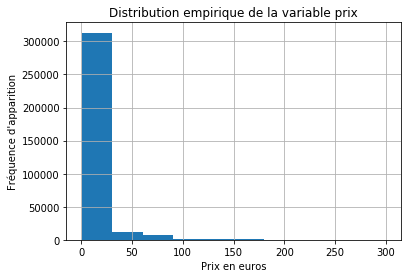

In [38]:
# plot price
plot_prix = df['price'].hist()
plt.title('Distribution empirique de la variable prix')
plt.xlabel('Prix en euros')
plt.ylabel("Fréquence d'apparition")
plt.show()
image= plot_prix.get_figure()
image.savefig('hist_prix')

In [39]:
# calcule du  prix moyen (la valeur « moyenne » est égale au quotient de la somme de toutes les valeurs de la série par l’effectif total)
df['price'].mean()

17.21602578307462

In [40]:
# calcule la médiane du prix (la médiane est la valeur centrale d'une série statistique dont les valeurs observées ont été rangées dans l'ordre croissant, est la valeur qui partage la population étudiée en deux sous-ensembles de même effectif (si le nombre d'observations n'est pair, la médiane est la demi-somme des termes de rang n et n + 1))
df['price'].median()

13.82

In [41]:
# calcule du mode du prix(prix le plus frequent)
df['price'].mode()

0    15.99
dtype: float64

#### Les indicateurs de tendance centrale pour l'âge des clients : mode, moyenne, médiane

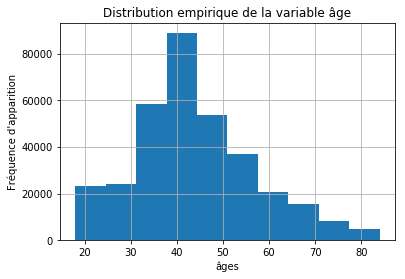

In [42]:
# plot âge
plot_age = df['âge'].hist()
plt.title('Distribution empirique de la variable âge')
plt.xlabel('âges')
plt.ylabel("Fréquence d'apparition")
plt.show()
image= plot_age.get_figure()
image.savefig('hist_age')

In [43]:
#plot âge avec les âges détailles
a = df.sort_values(by = 'âge')
real_age = a['âge'].value_counts()
modalites_age = real_age.index
age_clients = pd.DataFrame(modalites_age, columns =['âge'])
age_clients['n'] = real_age.values
age_clients['f'] = age_clients['n'] / len(df)
age_clients = age_clients.sort_values('âge')
age_clients['F'] = age_clients['f'].cumsum()

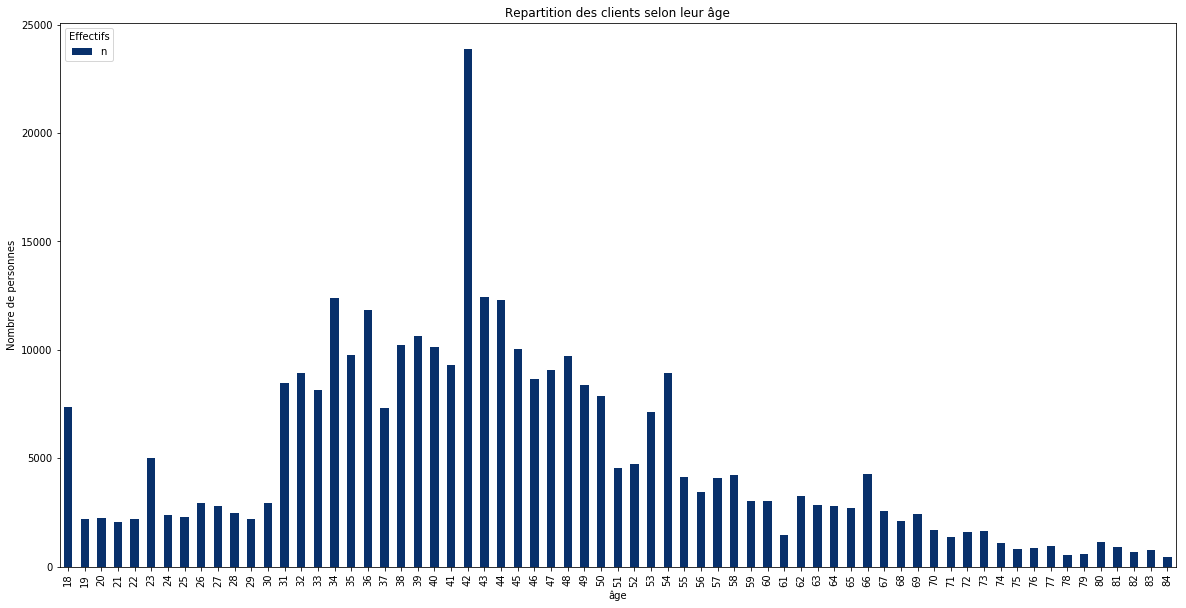

In [44]:
plot_age_clients =age_clients.plot(x='âge',y='n',kind='bar', figsize=(20,10), colormap='Blues_r')
plt.title('Repartition des clients selon leur âge')
plt.legend(title='Effectifs', loc='upper left')
plt.ylabel('Nombre de personnes')
plt.xlabel('âge')
plt.show(plot_age_clients)
image= plot_age_clients.get_figure()
image.savefig('graph_age')

In [45]:
# calcule de l'âge moyenne des clients
df['âge'].mean()

43.93429148915208

In [46]:
# calcule la médiane de l'âge des clients
df['âge'].median()

42.0

In [47]:
# calcule du mode de l'âge des clients(l'âge la plus frequente)
df['âge'].mode()

0    42
dtype: int64

In [48]:
df_by_age =df.groupby(['âge']).count()
df_by_age.sort_values('client_id', ascending = False).head(10)

,id_prod,price,categ,date,session_id,client_id,sex,birth,heure
âge,,,,,,,,,
42,23880,23880,23880,23880,23880,23880,23880,23880,23880
43,12424,12424,12424,12424,12424,12424,12424,12424,12424
34,12408,12408,12408,12408,12408,12408,12408,12408,12408
44,12279,12279,12279,12279,12279,12279,12279,12279,12279
36,11824,11824,11824,11824,11824,11824,11824,11824,11824
39,10636,10636,10636,10636,10636,10636,10636,10636,10636
38,10239,10239,10239,10239,10239,10239,10239,10239,10239
40,10109,10109,10109,10109,10109,10109,10109,10109,10109
45,10020,10020,10020,10020,10020,10020,10020,10020,10020


##### Les mesures de dispersion

#### Variance empirique, écart-type, écart inter-quartile
* Les notions de variance et d'écart-type servent à quantifier la dispersion d'un échantillon autour de sa moyenne

In [49]:
# Calcule de la variance empirique du prix
df['price'].var(ddof=0)

319.92697498566065

In [50]:
# calcule de l'écart-type
df['price'].std()

17.88652929273365

In [51]:
# Calcule de la variance empirique de l'âge
df['âge'].var(ddof=0)

173.28975701191746

In [52]:
# calcule de l'écart-type
df['âge'].std()

13.163976389187324

## Analyse de concentration, via une courbe de Lorenz et un indice de Gini

In [53]:
effectifs = df["price"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["price"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(df) # len(data) renvoie la taille de l'échantillon
tab.head()

,price,n,f
0,15.99,10495,0.031333
1,4.99,9366,0.027962
2,10.99,8902,0.026577
3,3.99,8678,0.025908
4,5.99,8241,0.024604


In [54]:
tab['price']= pd.cut(tab['price'], 20)
tab =tab.groupby(['price']).sum().reset_index()
tab['F']=tab['f'].cumsum()
tab.head()

,price,n,f,F
0,"(0.321, 15.589]",193848,0.578739,0.578739
1,"(15.589, 30.558]",119338,0.356287,0.935026
2,"(30.558, 45.527]",4352,0.012993,0.948019
3,"(45.527, 60.496]",7285,0.021750,0.969769
4,"(60.496, 75.465]",5838,0.017430,0.987198


#### Courbe de Lorenz

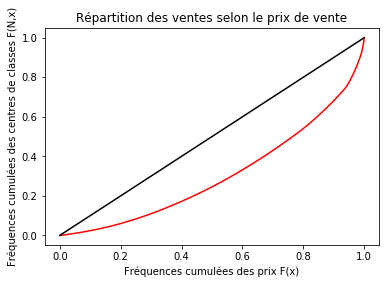

In [55]:
# plot de la courbe de Lorenz
dep = df['price'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plot_lorenz = plt.figure()
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post',color='red')
plt.plot([0,1], [0,1], color='k')
plt.title('Répartition des ventes selon le prix de vente')
plt.xlabel("Fréquences cumulées des prix F(x)")
plt.ylabel("Fréquences cumulées des centres de classes F(N,x)")
plt.show(plot_lorenz)


plot_lorenz.savefig('lorenz_prix_plot')


##### Indice de Gini

In [56]:

aire_lorenz = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"

S = 0.5 - aire_lorenz # aire entre la 1e bissectrice et la courbe de Lorenz

gini = 2*S

gini

print("L'indice de Gini est égal à {}".format(gini))

L'indice de Gini est égal à 0.3926130123792245


#### L'écart inter-quartile
##### Quartiles
* Le quartile inférieur est la valeur du milieu du premier ensemble, dans lequel 25 % des valeurs sont inférieures à Q1 et 75 % lui sont supérieures. Le premier quartile prend la notation Q1.
* Le quartile supérieur est la valeur du milieu du deuxième ensemble, dans lequel 75 % des valeurs sont inférieures à Q3 et 25 % lui sont supérieures. Le troisième quartile prend donc la notation Q3.


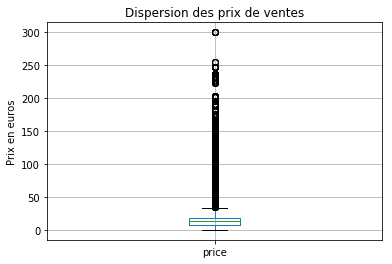

In [57]:
# plot boite à moustache avec prix de ventes
plot_dis_prix = df.boxplot(column="price")
plt.title('Dispersion des prix de ventes')
plt.ylabel('Prix en euros')
plt.show()
image= plot_dis_prix.get_figure()
image.savefig('boxplot_prix')

In [58]:
df['price'].describe()

count    334949.000000
mean         17.216026
std          17.886529
min           0.620000
25%           8.580000
50%          13.820000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [59]:
q_3 = np.percentile(df['price'], 75)
q_1 = np.percentile(df['price'], 25)

iqr = q_3 - q_1
b_1= df['price'][df['price']<=q_3+1.5*iqr].max()
b_2 = df['price'][df['price']>=q_1-1.5*iqr].min()
print("""Le Q1 est égal à {} et Q3 est égal à {} 
L'écart inter-quartile est égal à {} et les bornes sont respectivement de {} à {}""".format(q_1,q_3,iqr,b_2,b_1))

Le Q1 est égal à 8.58 et Q3 est égal à 18.99 
L'écart inter-quartile est égal à 10.409999999999998 et les bornes sont respectivement de 0.62 à 34.52


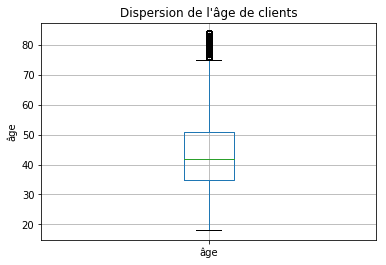

In [60]:
# plot boite à moustache avec l'âge des clients
plot_disp_age = df.boxplot(column="âge")
plt.title("Dispersion de l'âge de clients")
plt.ylabel('âge')
plt.show()
image= plot_disp_age.get_figure()
image.savefig('boxplot_age')

In [61]:
q_3 = np.percentile(df['âge'], 75)
q_1 = np.percentile(df['âge'], 25)

iqr = q_3 - q_1
b_1= df['âge'][df['âge']<=q_3+1.5*iqr].max()
b_2 = df['âge'][df['âge']>=q_1-1.5*iqr].min()
print("""Le Q1 est égal à {} et Q3 est égal à {} 
L'écart inter-quartile est égal à {} et les bornes sont respectivement de {} à {}""".format(q_1,q_3,iqr,b_2,b_1))

Le Q1 est égal à 35.0 et Q3 est égal à 51.0 
L'écart inter-quartile est égal à 16.0 et les bornes sont respectivement de 18 à 75


#### Représentation de série temporelle

* L'analyse d'une série chronologique nous aide à étudier la tendance génerale et mettre en évidence l'influence saisonnière, et essayer de la mesurer.

In [62]:
df_2 = df
df_2['date']=df_2['date'].map(lambda x: datetime.strptime(str(x), "%Y-%m-%d "))
df_2.index = pd.to_datetime(df_2.index, unit='m')

quantite de ventes total de produits categorie 1 est de : 108729


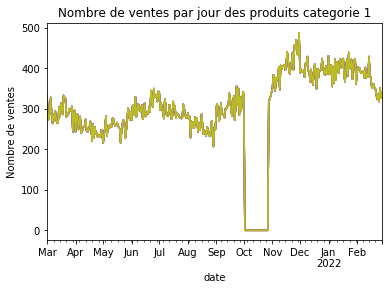

In [63]:
# plot de nombre de ventes par jour des produits de categorie 1

a= df_2[df_2['categ']==1]
print('quantite de ventes total de produits categorie 1 est de : ' + str(a['id_prod'].count()))
a= a.groupby((pd.Grouper(key='date',freq='D')))
a = a.count().plot(legend=False)

plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes par jour des produits categorie 1')
plt.show(a)
image= a.get_figure()
image.savefig('ventes_jour_cat_1')


In [64]:
# on regarde s'il y a des produits vendues de la categorie 1 dans le mois de octobre
o= df_2[df_2['categ']==1]
octobre = o.groupby([pd.Grouper(key='date', freq='M'),'categ']).count().reset_index()
octobre

,date,categ,id_prod,price,session_id,client_id,sex,birth,âge,heure
0,2021-03-31,1.0,9060,9060,9060,9060,9060,9060,9060,9060
1,2021-04-30,1.0,7504,7504,7504,7504,7504,7504,7504,7504
2,2021-05-31,1.0,8027,8027,8027,8027,8027,8027,8027,8027
3,2021-06-30,1.0,9186,9186,9186,9186,9186,9186,9186,9186
4,2021-07-31,1.0,9092,9092,9092,9092,9092,9092,9092,9092
5,2021-08-31,1.0,7890,7890,7890,7890,7890,7890,7890,7890
6,2021-09-30,1.0,9178,9178,9178,9178,9178,9178,9178,9178
7,2021-10-31,1.0,1645,1645,1645,1645,1645,1645,1645,1645
8,2021-11-30,1.0,12198,12198,12198,12198,12198,12198,12198,12198
9,2021-12-31,1.0,12163,12163,12163,12163,12163,12163,12163,12163


quantite de ventes total de produits categorie 0 est de : 208686


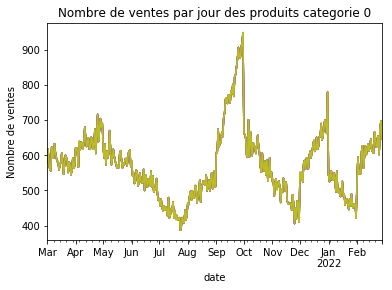

In [65]:
# plot de nombre de ventes par jour des produits de categorie 0
b= df_2[df_2['categ']==0]
print('quantite de ventes total de produits categorie 0 est de : ' + str(b['id_prod'].count()))
b= b.groupby((pd.Grouper(key='date',freq='D')))

b = b.count().plot(legend=False)

plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes par jour des produits categorie 0')
plt.show(b)
image= b.get_figure()
image.savefig('ventes_jour_cat_0')

quantite de ventes total de produits categorie 2 est de : 17534


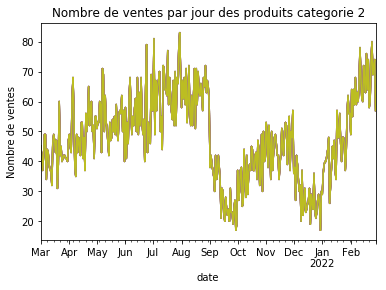

In [66]:
# plot de nombre de ventes par jour des produits de categorie 2
c= df_2[df_2['categ']==2]
print('quantite de ventes total de produits categorie 2 est de : ' + str(c['id_prod'].count()))
c= c.groupby((pd.Grouper(key='date',freq='D')))

c = c.count().plot(legend=False)

plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes par jour des produits categorie 2')
plt.show(c)
image= c.get_figure()
image.savefig('ventes_jour_cat_2')

In [67]:
df_2= df.groupby([pd.Grouper(key='date', freq='M'),'categ']).count().reset_index()
df_2['date']= df_2['date'].dt.strftime('%Y-%m-%d')
df_2 = df_2[['date','categ','session_id']]


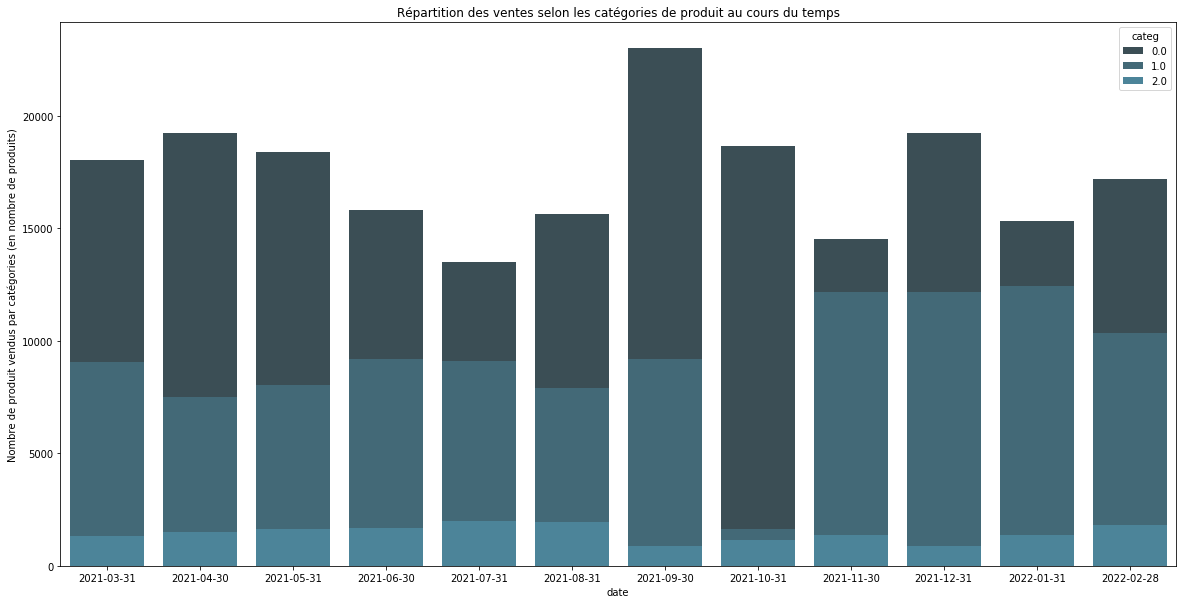

In [68]:
f, ax = plt.subplots(figsize=(20, 10))
my_plot = sns.barplot(x='date', y='session_id', hue='categ',dodge=False, data=df_2, palette=sns.color_palette("GnBu_d", 7))
ax.set_ylabel('Nombre de produit vendus par catégories (en nombre de produits)')
ax.set_title('Répartition des ventes selon les catégories de produit au cours du temps')
f.savefig('Répartition des ventes selon les catégories de produit au cours du temps')

In [69]:
df_price_0= df.loc[lambda df: df['categ'] == 0]

In [70]:
df_price_1= df.loc[lambda df: df['categ'] == 1]
octobre = df_price_1.groupby([pd.Grouper(key='date', freq='M'),'categ']).count().reset_index()
octobre

,date,categ,id_prod,price,session_id,client_id,sex,birth,âge,heure
0,2021-03-31,1.0,9060,9060,9060,9060,9060,9060,9060,9060
1,2021-04-30,1.0,7504,7504,7504,7504,7504,7504,7504,7504
2,2021-05-31,1.0,8027,8027,8027,8027,8027,8027,8027,8027
3,2021-06-30,1.0,9186,9186,9186,9186,9186,9186,9186,9186
4,2021-07-31,1.0,9092,9092,9092,9092,9092,9092,9092,9092
5,2021-08-31,1.0,7890,7890,7890,7890,7890,7890,7890,7890
6,2021-09-30,1.0,9178,9178,9178,9178,9178,9178,9178,9178
7,2021-10-31,1.0,1645,1645,1645,1645,1645,1645,1645,1645
8,2021-11-30,1.0,12198,12198,12198,12198,12198,12198,12198,12198
9,2021-12-31,1.0,12163,12163,12163,12163,12163,12163,12163,12163


In [71]:
df_price_2= df.loc[lambda df: df['categ'] == 2]


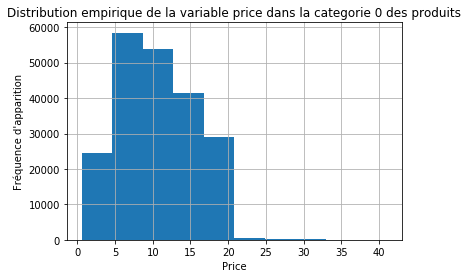

In [72]:
#Plot histogramme du prix des produits catégorie 0
plot_price_0 = df_price_0['price'].hist()
plt.title('Distribution empirique de la variable price dans la categorie 0 des produits')
plt.xlabel('Price')
plt.ylabel("Fréquence d'apparition")
plt.show()
image= plot_price_0.get_figure()
image.savefig('hist_price_0')

In [73]:
df_price_0.describe()

,price,categ,birth,âge
count,208686.000000,208686.0,208686.000000,208686.000000
mean,10.647040,0.0,1978.278275,43.721725
std,4.929239,0.0,10.875592,10.875592
min,0.620000,0.0,1938.000000,18.000000
25%,6.300000,0.0,1974.000000,36.000000
50%,9.990000,0.0,1980.000000,42.000000
75%,14.450000,0.0,1986.000000,48.000000
max,40.990000,0.0,2004.000000,84.000000


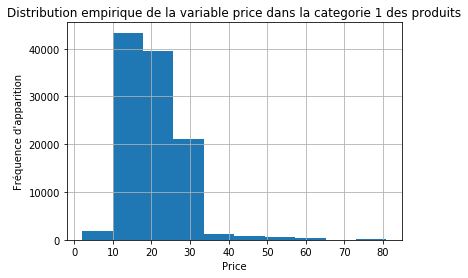

In [74]:
#Plot histogramme du prix des produits catégorie 1
plot_price_1 = df_price_1['price'].hist()
plt.title('Distribution empirique de la variable price dans la categorie 1 des produits')
plt.xlabel('Price')
plt.ylabel("Fréquence d'apparition")
plt.show()
image= plot_price_1.get_figure()
image.savefig('hist_price_1')

In [75]:
df_price_1.describe()

,price,categ,birth,âge
count,108729.000000,108729.0,108729.000000,108729.000000
mean,20.475955,1.0,1974.711622,47.288378
std,7.568764,0.0,15.088264,15.088264
min,2.000000,1.0,1938.000000,18.000000
25%,15.810000,1.0,1964.000000,36.000000
50%,19.080000,1.0,1975.000000,47.000000
75%,24.980000,1.0,1986.000000,58.000000
max,80.990000,1.0,2004.000000,84.000000


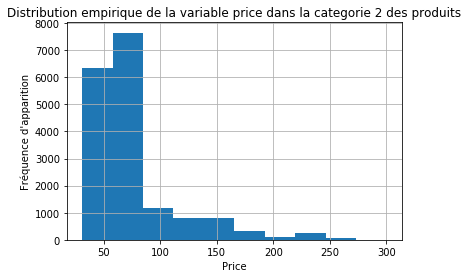

In [76]:
#Plot histogramme du prix des produits catégorie 2
plot_price_2 = df_price_2['price'].hist()
plt.title('Distribution empirique de la variable price dans la categorie 2 des produits')
plt.xlabel('Price')
plt.ylabel("Fréquence d'apparition")
plt.show()
image= plot_price_2.get_figure()
image.savefig('hist_price_2')

In [77]:
df_price_2.describe()

,price,categ,birth,âge
count,17534.000000,17534.0,17534.000000,17534.000000
mean,75.183770,2.0,1996.334607,25.665393
std,39.082553,0.0,9.320414,9.320414
min,30.990000,2.0,1938.000000,18.000000
25%,53.990000,2.0,1994.000000,20.000000
50%,62.830000,2.0,1999.000000,23.000000
75%,71.210000,2.0,2002.000000,28.000000
max,300.000000,2.0,2004.000000,84.000000


##### Chiffre d'affaire par mois

In [78]:
# calcule de CA par mois
df_ca_mois = df[['price','date']]
df_ca_mois = df_ca_mois.groupby(pd.Grouper(key='date',freq='M')).sum().reset_index() #Les données sont groupées par mois en les sommant

df_ca_mois.columns = ['mois','CA'] 

df_ca_mois['CA'] = df_ca_mois['CA']/1000
df_ca_mois


,mois,CA
0,2021-03-31,476.72197
1,2021-04-30,470.63221
2,2021-05-31,486.91790
3,2021-06-30,479.03441
4,2021-07-31,478.77567
5,2021-08-31,477.31445
6,2021-09-30,500.02765
7,2021-10-31,317.84875
8,2021-11-30,509.80984
9,2021-12-31,520.27168


In [79]:
# On calcule la moyenne de la CA
df_ca_mois['CA'].mean()

480.5408849999135

In [80]:
# On calcule la médiane de la CA
df_ca_mois['CA'].median()

482.97615499991525

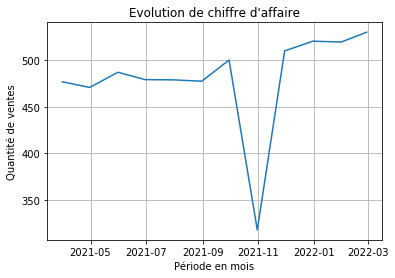

In [81]:
# graphique avec l'evolution de la CA

fig, ax = plt.subplots()
ax.plot(df_ca_mois['mois'], df_ca_mois['CA'])

ax.set(xlabel='Période en mois', ylabel='Quantité de ventes',
       title="Evolution de chiffre d'affaire")
ax.grid()

fig.savefig("chiffre_d_affaire.png")
plt.show()



In [82]:
# calcule la quantité des produits vendus par mois
df_prod_mois = df[['id_prod','session_id','date']]
df_prod_mois = df_prod_mois.groupby(pd.Grouper(key='date',freq='M')).count().reset_index() #Les données sont groupées par mois en les sommant


df_prod_mois.columns = ['mois','qte_produits','session_id'] 

df_prod_mois

,mois,qte_produits,session_id
0,2021-03-31,28410,28410
1,2021-04-30,28262,28262
2,2021-05-31,28097,28097
3,2021-06-30,26675,26675
4,2021-07-31,24589,24589
5,2021-08-31,25487,25487
6,2021-09-30,33074,33074
7,2021-10-31,21485,21485
8,2021-11-30,28091,28091
9,2021-12-31,32264,32264


In [83]:
df_prod_mois.describe()

,qte_produits,session_id
count,12.000000,12.000000
mean,27912.416667,27912.416667
std,3154.192317,3154.192317
min,21485.000000,21485.000000
25%,26378.000000,26378.000000
50%,28179.500000,28179.500000
75%,29191.250000,29191.250000
max,33074.000000,33074.000000


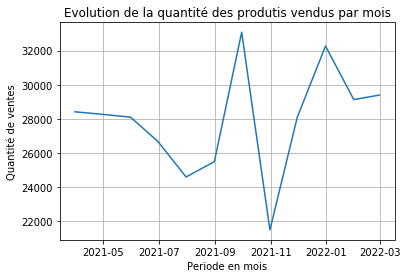

In [84]:
# graphique avec l'évolution de la quantité des produits vendus par mois

fig, ax = plt.subplots()
ax.plot(df_prod_mois['mois'], df_prod_mois['qte_produits'])

ax.set(xlabel='Periode en mois', ylabel='Quantité de ventes',
       title='Evolution de la quantité des produtis vendus par mois')
ax.grid()

fig.savefig("volumen_ventes.png")
plt.show()

##### Repartition du genre des clients

In [85]:
df_genre = df[['sex','client_id']]
df_genre = df_genre.groupby(pd.Grouper(key='sex')).count().reset_index() 
df_genre.columns = ['genre','quantité']
df_genre

,genre,quantité
0,f,166242
1,m,168707


In [86]:
# dépenses par rapport au genre des clients
df_genre = df[['sex','price']]
df_genre = df_genre.groupby(pd.Grouper(key='sex')).sum().reset_index() 
df_genre.columns = ['genre','dépenses']
df_genre

,genre,dépenses
0,f,2.837149e+06
1,m,2.929342e+06


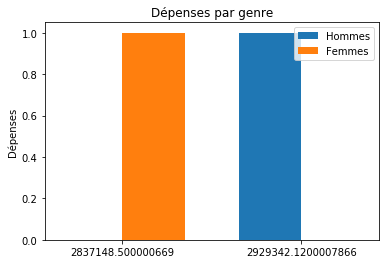

In [87]:
# plot total des dépenses hommes vs femmes
labels = df_genre['dépenses']
men_means = df_genre['genre']=='m'
women_means = df_genre['genre']=='f'

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Hommes')
rects2 = ax.bar(x + width/2, women_means, width, label='Femmes')

# Titles
ax.set_ylabel('Dépenses')
ax.set_title('Dépenses par genre')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
fig.savefig('Dep_genre')

##### Calcule du montant du panier

In [88]:
df_panier = df[['session_id','price']]
df_panier.columns = ['session_id','panier'] 
df_panier = df_panier.groupby(pd.Grouper(key='session_id')).sum().reset_index() 
df_panier.head()

,session_id,panier
0,s_17806,17.60
1,s_53240,18.64
2,s_40833,45.60
3,s_2176,40.60
4,s_70595,9.61


In [89]:
# on calcule la moyenne du montant du panier
df_panier['panier'].mean()

34.34131517361371

In [90]:
# on calcule la mediane du montant du panier
df_panier['panier'].median()

25.71

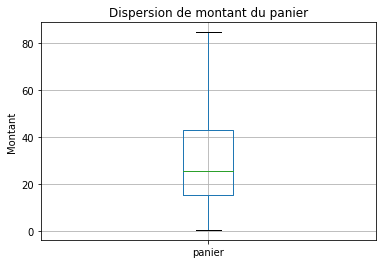

In [91]:
# représentation de la dispersion du montant du panier
plot_dis_panier = df_panier.boxplot(column="panier", showfliers=False)
plt.title('Dispersion de montant du panier')
plt.ylabel('Montant')
plt.show()
image= plot_dis_panier.get_figure()
image.savefig('boxplot_panier')

In [92]:
df_panier.describe()

,panier
count,167917.000000
mean,34.341315
std,31.929197
min,0.620000
25%,15.360000
50%,25.710000
75%,43.020000
max,539.230000


In [93]:
q_3 = np.percentile(df_panier['panier'], 75)
q_1 = np.percentile(df_panier['panier'], 25)

iqr = q_3 - q_1
b_1= df_panier['panier'][df_panier['panier']<=q_3+1.5*iqr].max()
b_2 = df_panier['panier'][df_panier['panier']>=q_1-1.5*iqr].min()
print("""Le Q1 est égal à {} et Q3 est égal à {} 
L'écart inter-quartile est égal à {} et les bornes sont respectivement de {} à {}""".format(q_1,q_3,iqr,b_2,b_1))

Le Q1 est égal à 15.36 et Q3 est égal à 43.02 
L'écart inter-quartile est égal à 27.660000000000004 et les bornes sont respectivement de 0.62 à 84.50999999999999


In [94]:
df_panier['panier'].var(ddof=0)

1019.4675767799873

#### Courbe de Lorenz de la variable "panier"

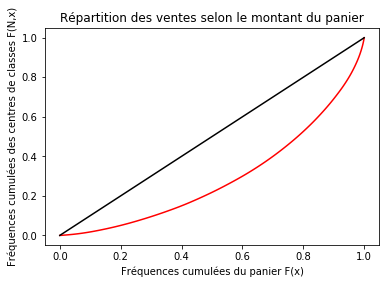

In [95]:
dep = df_panier['panier'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plot_lorenz = plt.figure()
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post',color='red')
plt.plot([0,1], [0,1], color='k')
plt.title('Répartition des ventes selon le montant du panier')
plt.xlabel("Fréquences cumulées du panier F(x)")
plt.ylabel("Fréquences cumulées des centres de classes F(N,x)")
plt.show(plot_lorenz)


plot_lorenz.savefig('lorenz_panier_plot')

In [96]:

aire_lorenz = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"

S = 0.5 - aire_lorenz # aire entre la 1e bissectrice et la courbe de Lorenz

gini = 2*S

gini

print("L'indice de Gini est égal à {}".format(gini))

L'indice de Gini est égal à 0.4203424642916572


#### Analyses bivariées

##### Montant du panier par genre

In [97]:
df_panier_sex = df[['sex','price', 'session_id']]
df_panier_sex.columns = ['sex','panier','session_id'] 
df_panier_sex.groupby(['session_id']).sum().reset_index() 
df_panier_sex.head()

,sex,panier,session_id
1970-06-10 22:07:00,f,0.62,s_17806
1970-02-17 20:49:00,f,0.62,s_53240
1970-01-07 18:39:00,m,0.62,s_40833
1970-04-28 22:36:00,m,0.62,s_2176
1970-02-01 21:09:00,f,0.62,s_70595


In [98]:
df_panier_m = df_panier_sex.loc[df_panier_sex['sex']== 'm']
df_panier_m.head()

,sex,panier,session_id
1970-01-07 18:39:00,m,0.62,s_40833
1970-04-28 22:36:00,m,0.62,s_2176
1970-02-26 21:00:00,m,0.62,s_156085
1970-06-08 16:12:00,m,0.62,s_51439
1970-02-26 01:49:00,m,0.62,s_104606


In [99]:
# on calcule la moyenne du montant du panier pour les hommes
df_panier_m['panier'].mean()

17.363488889025273

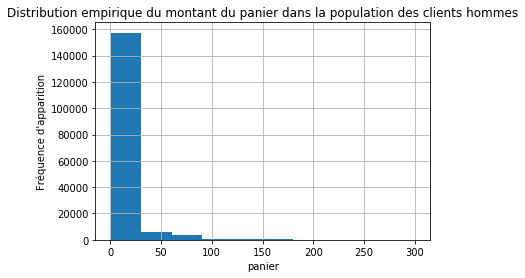

In [100]:
# plot panier
plot_panier_m =df_panier_m['panier'].hist()
plt.title('Distribution empirique du montant du panier dans la population des clients hommes')
plt.xlabel('panier')
plt.ylabel("Fréquence d'apparition")
plt.show()
image= plot_panier_m.get_figure()
image.savefig('hist_panier_m')

In [101]:
df_panier_f = df_panier_sex.loc[df_panier_sex['sex']== 'f']
df_panier_f.head()

,sex,panier,session_id
1970-06-10 22:07:00,f,0.62,s_17806
1970-02-17 20:49:00,f,0.62,s_53240
1970-02-01 21:09:00,f,0.62,s_70595
1970-08-16 13:24:00,f,0.62,s_99272
1970-02-21 02:16:00,f,0.62,s_107804


In [102]:
# on calcule la moyenne du montant du panier pour les femmes
df_panier_f['panier'].mean()

17.066376126374017

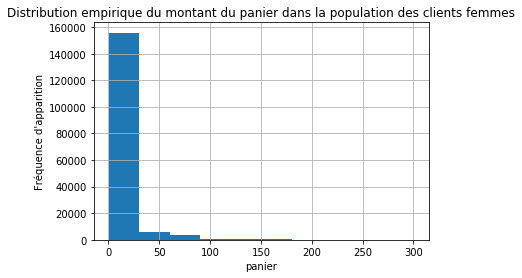

In [103]:
# plot panier
plot_panier_f =df_panier_f['panier'].hist()
plt.title('Distribution empirique du montant du panier dans la population des clients femmes')
plt.xlabel('panier')
plt.ylabel("Fréquence d'apparition")
plt.show()
image= plot_panier_f.get_figure()
image.savefig('hist_panier_f')

#### Calcule des ventes en fonction de l'heure

In [104]:
# création de df avec les ventes par heure
df_ventes_heure = df[['date','heure','session_id']]
df_ventes_heure['date'] = df_ventes_heure['date'].map(lambda x: str(x)[5:]) 
df_ventes_heure


/Volumes/MarceloHD1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,heure,session_id
1970-06-10 22:07:00,04-08 00:00:00,17:47:18,s_17806
1970-02-17 20:49:00,06-24 00:00:00,18:55:00,s_53240
1970-01-07 18:39:00,05-28 00:00:00,18:10:03,s_40833
1970-04-28 22:36:00,03-05 00:00:00,17:06:24,s_2176
1970-02-01 21:09:00,08-02 00:00:00,23:27:31,s_70595
1970-08-16 13:24:00,10-03 00:00:00,06:32:48,s_99272
1970-02-21 02:16:00,10-21 00:00:00,01:34:57,s_107804
1970-02-26 21:00:00,01-27 00:00:00,19:25:10,s_156085
1970-08-19 05:48:00,10-20 00:00:00,05:44:08,s_107417
1970-07-13 23:39:00,05-14 00:00:00,15:26:20,s_34456


In [105]:

df_ventes_heure['date'] = df_ventes_heure['date'].map(lambda x: str(x)[:-12])
df_ventes_heure.columns = ['date','heure','ventes']
df_ventes_heure

/Volumes/MarceloHD1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,heure,ventes
1970-06-10 22:07:00,04,17:47:18,s_17806
1970-02-17 20:49:00,06,18:55:00,s_53240
1970-01-07 18:39:00,05,18:10:03,s_40833
1970-04-28 22:36:00,03,17:06:24,s_2176
1970-02-01 21:09:00,08,23:27:31,s_70595
1970-08-16 13:24:00,10,06:32:48,s_99272
1970-02-21 02:16:00,10,01:34:57,s_107804
1970-02-26 21:00:00,01,19:25:10,s_156085
1970-08-19 05:48:00,10,05:44:08,s_107417
1970-07-13 23:39:00,05,15:26:20,s_34456


In [106]:
# création de df avec les ventes par heure mois de septembre
df_ventes_heure_sep =df_ventes_heure.loc[df_ventes_heure['date']== '09']

df_ventes_heure_sep.head()

,date,heure,ventes
1970-02-04 18:59:00,09,22:08:16,s_88484
1970-04-18 00:53:00,09,16:04:18,s_83637
1970-06-04 08:20:00,09,05:02:26,s_86176
1970-08-12 06:09:00,09,23:52:15,s_85147
1970-06-11 00:47:00,09,11:57:10,s_86308


In [107]:

df_ventes_heure_sep =df_ventes_heure_sep.groupby(df_ventes_heure_sep.index.hour).count()

df_ventes_heure_sep


,date,heure,ventes
0,1428,1428,1428
1,1366,1366,1366
2,1363,1363,1363
3,1415,1415,1415
4,1546,1546,1546
5,1402,1402,1402
6,1330,1330,1330
7,1359,1359,1359
8,1309,1309,1309
9,1354,1354,1354


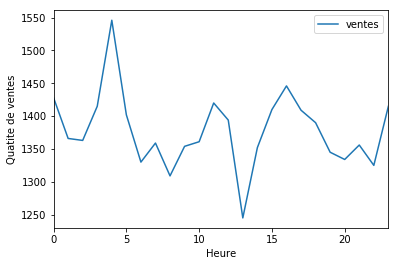

In [108]:
# plot des ventes par heure dans le mois de septembre
a = df_ventes_heure_sep.reset_index().plot(x='index', y='ventes')
plt.xlabel('Heure')
plt.ylabel("Quatite de ventes")
plt.show(a)

image= a.get_figure()
image.savefig('ventes_heure_sep.png')

In [109]:
# création de df avec les ventes par heure mois de decembre
df_ventes_heure_dec =df_ventes_heure.loc[df_ventes_heure['date']== '12']

In [110]:
df_ventes_heure_dec =df_ventes_heure_dec.groupby(df_ventes_heure_dec.index.hour).count()

df_ventes_heure_dec

,date,heure,ventes
0,1296,1296,1296
1,1207,1207,1207
2,1327,1327,1327
3,1305,1305,1305
4,1441,1441,1441
5,1391,1391,1391
6,1475,1475,1475
7,1450,1450,1450
8,1348,1348,1348
9,1369,1369,1369


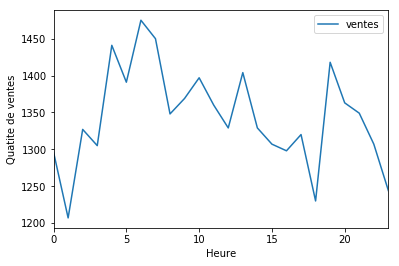

In [111]:
# plot des ventes par heure dans le mois de decembre
a = df_ventes_heure_dec.reset_index().plot(x='index', y='ventes')
plt.xlabel('Heure')
plt.ylabel("Quatite de ventes")
plt.show(a)

image= a.get_figure()
image.savefig('ventes_heure_dec.png')

###### Observation :
* La CA est ascendante avec le temps.
* Les ventes montent entre 10h et 13hs aprox, l'heure de pointe est entre 8h et 9h. 
* Il n'y a pas de différence de comportement dans les achats par rapport au genre des clients.
* Il y a une chute des ventes dans le mois d'octobre.
* Les mois de septembre et décembre sont les mois où on constate plus de ventes.
* Les produits de la catégorie 0 sont les plus vendus.



#### Fin de la mission 2


##### Mission n°3
Voici quelques questions supplémentaires, que votre manager vous a posées :

* Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
* Y a-t-il une corrélation entre l'âge des clients et :
* le montant total des achats
* la fréquence d’achat (ie. nombre d'achats par mois par exemple)
* la taille du panier moyen (en nombre d’articles)
* les catégories de produits achetés

###### Pour les corrélations, pas besoin d'effectuer en entier les tests (chi-2, ANOVA, etc.). Seul le calcul des statistiques de test est demandé ( \(r^2, \eta^2, \xi_n\) ).

#### Correlation 
* Correlation: une mesure  d'interdependence entre variables.
    
#### Correlation de Pearson

* la correlation de  Pearson  mesure la  dependence linéaire entre deux  variables X et Y.


Le resultat du coefficient est une valeur entre -1 et 1. Son interprétation est la suivante :

* 1 : il existe une forte relation linéaire positive entre X et Y.
* 0 : il n'y a pas de relation linéaire entre X et Y.
* -1 : il existe une forte relation linéaire négative entre X et Y.


#### La valeur P :
* La valeur de P est la valeur de probabilité que la corrélation entre  deux variables est statistiquement significative. 
Normalement, nous choisissons un niveau de signification de 0,05, ce qui signifie que nous sommes à 95 % confiants que la corrélation entre les variables est significative.

Par convention, lorsque :

* la valeur p est 0.001 : nous disons qu’il y a des preuves solides que la corrélation soit significative.
* la valeur p est de 0,05 : il y a des preuves modérées que la corrélation soit significative.
* la valeur de p est 0.1 : il y a peu de preuves que la corrélation soit significative.


##### Formulation des deux hypothèses :
1. L’hypothèse nulle H0 : elle affirme que la situation respecte un statu quo, souvent du au hasard.
2. L’hypothèse alternative H1 : elle met en évidence un phénomène dont on veut tester le bien fondé.

In [112]:
# On regarde les quelles sont les valuers plus correlées avec les prix des produits
df.corr()['price'].sort_values()

âge     -0.217570
birth    0.217570
categ    0.673827
price    1.000000
Name: price, dtype: float64

###### Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés?

* H0 = Les deux variables sont independentes
* H1 = Les deux variables sont  dependentes
* Les variables 'age' et 'categ' sont respentivement des variables quantitatives et qualitatives donc on utilise le test de Anova pour confirmer où pas l'hypothèses du départ.

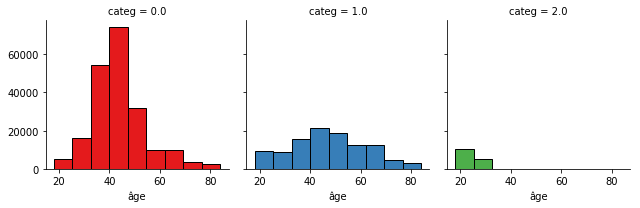

In [113]:
# Plot de la relation entre l'age et la categorie des produits
bins = np.linspace(df.âge.min(), df.âge.max(), 10)
g = sns.FacetGrid(df,col ='categ', hue="categ", palette="Set1")
g.map(plt.hist, 'âge', bins=bins, ec="k")

plt.show()
g.savefig('plot_age_genre_categ')

In [114]:
import pingouin as pg
# Calcule ANOVA
aov = pg.anova(dv='âge', between='categ', data=df)
# Print  ANOVA 
pg.print_table(aov)


ANOVA SUMMARY

Source      ddof1    ddof2          F    p-unc    np2
--------  -------  -------  ---------  -------  -----
categ           2   334946  23283.327    0.000  0.122



In [115]:
df_anova= df[['categ', 'âge']]
group_anova = df_anova.groupby(['categ'])
result = st.f_oneway(group_anova.get_group(0)['âge'],group_anova.get_group(1)['âge'] )
result

F_onewayResult(statistic=5838.73197472877, pvalue=0.0)

In [116]:
df_anova= df[['categ', 'âge']]
group_anova = df_anova.groupby(['categ'])
result = st.f_oneway(group_anova.get_group(0)['âge'],group_anova.get_group(2)['âge'] )
result

F_onewayResult(statistic=45522.709238046344, pvalue=0.0)

In [117]:
df_anova= df[['categ', 'âge']]
group_anova = df_anova.groupby(['categ'])
result = st.f_oneway(group_anova.get_group(1)['âge'],group_anova.get_group(2)['âge'] )
result

F_onewayResult(statistic=33923.24935819646, pvalue=0.0)

### Test de Levene

* Une hypothèse importante dans l'analyse de la variance (ANOVA et le test-t pour les différences de moyennes) est que les variances dans les différents groupes sont égales (homogènes).

* Pour chaque variable dépendante, une analyse de variance est réalisée sur les écarts absolus des valeurs aux moyennes des groupes respectifs. Si le test de Levene est statistiquement significatif, l'hypothèse d'homogénéité des variances doit être rejetée.

In [118]:
stats.levene(df['âge'][df['categ'] == 0],
             df['âge'][df['categ'] == 1],
             df['âge'][df['categ'] == 2])

LeveneResult(statistic=13443.070670746332, pvalue=0.0)

In [119]:
from statsmodels.formula.api import ols
results = ols('âge ~ C(categ)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    âge   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                 2.328e+04
Date:                Thu, 24 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:40:32   Log-Likelihood:            -1.3168e+06
No. Observations:              334949   AIC:                         2.634e+06
Df Residuals:                  334946   BIC:                         2.634e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          43.7217      0.027   1619.283      0.000      43.669      43.775
C(categ)[T.1.0]     3.5667      0.046     77.312      0.000       3.476       3.657
C(categ)[T.2.0]   -18.0563      0.097   -186.179      0.000     -18.246     -17.866
==============================================================================
Omnibus:                    16816.607   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21145.750
Skew:                           0.515   Prob(JB):                         0.00
Kurtosis:                       3.673   Cond. No.                         4.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
results.diagn

{'jb': 21145.749779132093,
 'jbpv': 0.0,
 'skew': 0.5154788354675007,
 'kurtosis': 3.672514931088322,
 'omni': 16816.606747069847,
 'omnipv': 0.0,
 'condno': 4.880709158792953,
 'mineigval': 15929.621565560734}

### Tests de normalité

* La statistique W peut donc être interprétée comme le coecient de détermination (le carré du coecient de corrélation) entre la série des quantiles générées à partir de la loi normale et les quantiles empiriques obtenues à partir des données. Plus W est élevé, plus la compatibilité avec la loi normale est crédible.

In [121]:
stats.shapiro(results.resid)

/Volumes/MarceloHD1/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9746394157409668, 0.0)

* Le resultat du test ANOVA signale une forte correlation entre les categorie de produits et l'age des clients car on a un F très large et p valuer très petit.
* En termes de valeur p, l'hypothèse nulle est rejetée lorsque p ≤ 0,05.
* On garde H1 :  les deux variables sont dépendentes

###### Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

* H0 = La categorie de produits achetes ne dépend pas de sex des clients. Les deux variables sont independentes
* H1 = La categorie de produits achetes dépend  de sex des clients. Les deux variables sont  dependentes
* Les variables 'sex' et 'categ' sont des variables qualitatives donc on utilise le test de CHI-2 pour confirmer où pas l'hypothèses du départ. 

In [122]:
data = df[["sex","categ"]]

table = sm.stats.Table.from_data(data)
print(table.table_orig)
print(table.fittedvalues)
print(table.resid_pearson)
print(table.chi2_contribs)

categ     0.0    1.0   2.0
sex                       
f      103258  54739  8245
m      105428  53990  9289
categ          0.0           1.0         2.0
sex                                         
f      103575.1055  53964.413741  8702.48076
m      105110.8945  54764.586259  8831.51924
categ       0.0       1.0       2.0
sex                                
f     -0.985317  3.334387 -4.904009
m      0.978092 -3.309938  4.868051
categ       0.0        1.0        2.0
sex                                  
f      0.970850  11.118139  24.049309
m      0.956665  10.955691  23.697921


In [123]:
t= table.table_orig
stat, p, dof, expected = chi2_contingency(t)
# interpreter test-statistiques
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (rejet H0)')
else:
	print('Independent (pas rejet H0)')
# interpreter p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (rejet H0)')
else:
	print('Independent (pas rejet H0)')

probability=0.950, critical=5.991, stat=71.749
Dependent (rejet H0)
significance=0.050, p=0.000
Dependent (rejet H0)


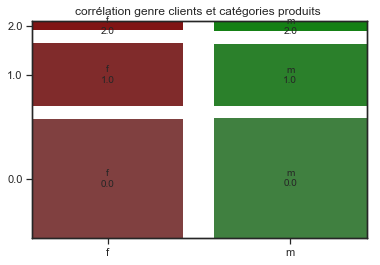

In [124]:
fig, _ = mosaic(data, index= ["sex","categ"],  gap=0.1,title='corrélation genre clients et catégories produits ')
fig.savefig('chi_2.png')

In [125]:
df_categ_sex = df.groupby(['sex','categ']).count().reset_index()
df_categ_sex

,sex,categ,id_prod,price,date,session_id,client_id,birth,âge,heure
0,f,0.0,103258,103258,103258,103258,103258,103258,103258,103258
1,f,1.0,54739,54739,54739,54739,54739,54739,54739,54739
2,f,2.0,8245,8245,8245,8245,8245,8245,8245,8245
3,m,0.0,105428,105428,105428,105428,105428,105428,105428,105428
4,m,1.0,53990,53990,53990,53990,53990,53990,53990,53990
5,m,2.0,9289,9289,9289,9289,9289,9289,9289,9289


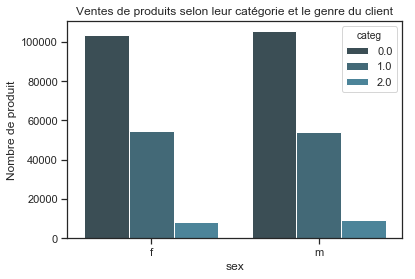

In [126]:

f= plt.figure()
plot_df_categ_sex = sns.barplot(x="sex", y="session_id",hue="categ", data=df_categ_sex, palette=sns.color_palette("GnBu_d", 7))
plot_df_categ_sex.set_title('Ventes de produits selon leur catégorie et le genre du client')
plot_df_categ_sex.set_ylabel('Nombre de produit')
f.savefig('Ventes_categ_sex.png')

* Le test du CHI-2 nous confirme de rejeter H0
* En termes de valeur p, l'hypothèse nulle est rejetée lorsque p ≤ 0,05.
* On garde H1 :  les deux variables sont dépendentes 

#### Y a-t-il une corrélation entre l'âge des clients et le montant total des achats?

* H0 = Les variables ne sont pas correlées, alors r = 0. 
* H1 = Les variables  sont correlées, alors r > 0. 
* Les variables 'age' et 'montant total des achats' sont des variables quantitatives donc on utilise le coefficient de correlation de Pearson (r) et la p-valeur pour confirmer où pas l'hypothèses du départ.

In [127]:
df_panier_age = df[['âge','price']]
df_panier_age.columns = ['âge','panier'] 
df_panier_age = df_panier_age.groupby(pd.Grouper(key='âge')).sum().reset_index() 
df_panier_age.head()

,âge,panier
0,47,117899.81
1,33,106830.71
2,42,306072.84
3,46,111535.12
4,38,133926.54


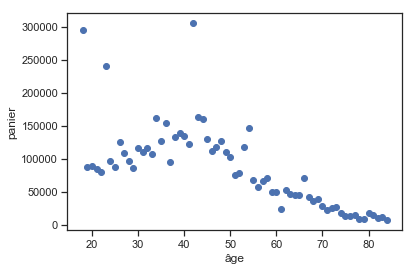

In [128]:
# montant du panier vs âge

x =df_panier_age['âge']
y = df_panier_age['panier']

b= plt.scatter(x, y, alpha=1)
plt.xlabel('âge')
plt.ylabel('panier')
plt.show()
i=b.get_figure()
i.savefig('panier_montant_age')

In [129]:
# calcule du coefficient de corrélation de Pearson
coef_corr_pearson = st.pearsonr(df_panier_age['âge'],df_panier_age['panier'])[0]
print(coef_corr_pearson)
p_value= st.pearsonr(df_panier_age['âge'],df_panier_age['panier'])[1]
print(p_value)

-0.7193350986005604
7.020345483883165e-12


In [130]:
pg.corr(df_panier_age['âge'],df_panier_age['panier'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,67,-0.719,"[-0.82, -0.58]",0.517,0.502,7.020345e-12,1.468e+09,1.0


* En regardant le graphique on voit que les clients entre 30 et 50 ans depense plus que les autres. A fur et mesure que l'age des clients montent les montant du panier descend.
* r est egal à -0,71 (plus proche d'un que de zero) ces deux variables ont une corrélation moyenne et negative.
* On garde H1

##### Y a-t-il une corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles)?

* H0 = Les variables ne sont pas correlées, alors r = 0.
* H1 = Les variables sont correlées, alors r > 0.
* Les variables 'age' et 'taille du panier moyen' sont des variables quantitatives donc on utilise le coefficient de corrélation de Pearson (r) et la p-valeur pour confirmer où pas l'hypothèses du départ.

In [131]:
# On calcule la taille du panier en relation à l'âge du client
df_panier_age_art_count = df.groupby(['âge', 'session_id']).count().reset_index()
df_panier_age_art = df_panier_age_art_count.groupby(['âge']).mean().reset_index()
df_panier_age_art.drop(['birth', 'client_id','sex','price', 'categ','date', 'heure'], axis = 1, inplace = True)
df_panier_age_art.head(10)

,âge,id_prod
0,18,1.757054
1,19,1.724901
2,20,1.742947
3,21,1.732310
4,22,1.843220
5,23,1.539101
6,24,1.738745
7,25,1.858179
8,26,1.714036
9,27,1.789575


In [132]:
top_ten=df_panier_age_art.sort_values('id_prod', ascending= False)
top_ten.head(10)

,âge,id_prod
31,49,2.469545
30,48,2.445145
26,44,2.434860
16,34,2.434373
22,40,2.431802
27,45,2.431449
20,38,2.430912
25,43,2.428460
14,32,2.422983
29,47,2.422758


In [133]:
df_panier_age_art.corr()['âge']

âge        1.000000
id_prod   -0.551968
Name: âge, dtype: float64

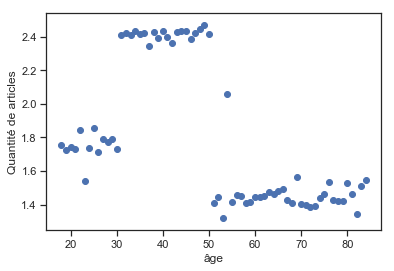

In [134]:
# plot de la relation ente l'âge des clients et la quantité d'articles par panier

x =df_panier_age_art['âge']
y =df_panier_age_art['id_prod']
     
b =plt.scatter(x, y,  alpha=1)
plt.xlabel('âge')
plt.ylabel("Quantité de articles")
plt.show()
i=b.get_figure()
i.savefig('panier_art_age')

In [135]:
# calcule du coefficient de corrélation de Pearson
coef_corr_pearson = st.pearsonr(df_panier_age_art['âge'],df_panier_age_art['id_prod'])[0]
print(coef_corr_pearson)
p_value=  st.pearsonr(df_panier_age_art['âge'],df_panier_age_art['id_prod'])[1]
print(p_value)

-0.5519677933112949
1.2864760435197308e-06


In [136]:
pg.corr(df_panier_age_art['âge'],df_panier_age_art['id_prod'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,67,-0.552,"[-0.7, -0.36]",0.305,0.283,0.000001,1.456e+04,0.999


In [137]:
df_moins_30 =df_panier_age_art.groupby('âge').filter(lambda x: x['âge'].sum()<= 30)
df_moins_30

,âge,id_prod
0,18,1.757054
1,19,1.724901
2,20,1.742947
3,21,1.732310
4,22,1.843220
5,23,1.539101
6,24,1.738745
7,25,1.858179
8,26,1.714036
9,27,1.789575


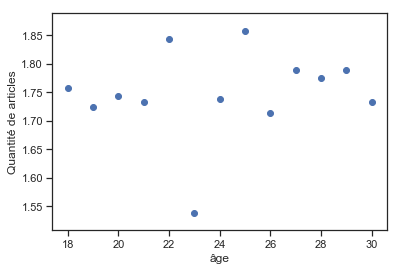

In [138]:
# plot de la relation ente l'âge des clients et la quantité d'articles par panier

x =df_moins_30['âge']
y = df_moins_30['id_prod']


b =plt.scatter(x, y,  alpha=1)
plt.xlabel('âge')
plt.ylabel("Quantité de articles")
plt.show()
i=b.get_figure()
i.savefig('panier_art_age_mois_30')

In [139]:
pg.corr(df_moins_30['âge'],df_moins_30['id_prod'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,13,0.148,"[-0.44, 0.65]",0.022,-0.174,0.629614,0.379,0.077


In [140]:
df_moins_30['group'] = '0'
del df_moins_30['âge']
df_moins_30

/Volumes/MarceloHD1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id_prod,group
0,1.757054,0
1,1.724901,0
2,1.742947,0
3,1.732310,0
4,1.843220,0
5,1.539101,0
6,1.738745,0
7,1.858179,0
8,1.714036,0
9,1.789575,0


In [141]:
df_plus_30_moins_50_1 =df_panier_age_art.groupby('âge').filter(lambda x: x['âge'].sum()> 30)
df_plus_30_moins_50 =df_plus_30_moins_50_1.groupby('âge').filter(lambda x: x['âge'].sum()<=50)
df_plus_30_moins_50

,âge,id_prod
13,31,2.408691
14,32,2.422983
15,33,2.411922
16,34,2.434373
17,35,2.415633
18,36,2.419975
19,37,2.345770
20,38,2.430912
21,39,2.391187
22,40,2.431802


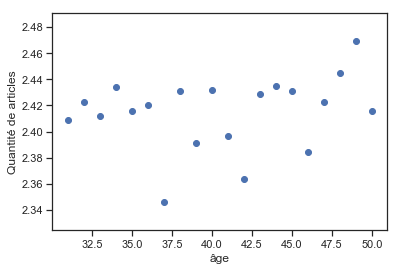

In [142]:
# plot de la relation ente l'âge des clients et la quantité d'articles par panier

x =df_plus_30_moins_50['âge']
y = df_plus_30_moins_50['id_prod']


b =plt.scatter(x, y,  alpha=1)
plt.xlabel('âge')
plt.ylabel("Quantité de articles")
plt.show()
i=b.get_figure()
i.savefig('panier_art_age_30_50')

In [143]:
pg.corr(df_plus_30_moins_50['âge'],df_plus_30_moins_50['id_prod'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,20,0.241,"[-0.23, 0.62]",0.058,-0.053,0.306742,0.451,0.178


In [144]:
df_plus_30_moins_50['group'] = '1'
del df_plus_30_moins_50['âge']
df_plus_30_moins_50

/Volumes/MarceloHD1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id_prod,group
13,2.408691,1
14,2.422983,1
15,2.411922,1
16,2.434373,1
17,2.415633,1
18,2.419975,1
19,2.345770,1
20,2.430912,1
21,2.391187,1
22,2.431802,1


In [145]:
df_plus_50 =df_panier_age_art.groupby('âge').filter(lambda x: x['âge'].sum()> 50)
df_plus_50

,âge,id_prod
33,51,1.411400
34,52,1.444275
35,53,1.319378
36,54,2.060263
37,55,1.416781
38,56,1.454392
39,57,1.450018
40,58,1.408502
41,59,1.415609
42,60,1.443812


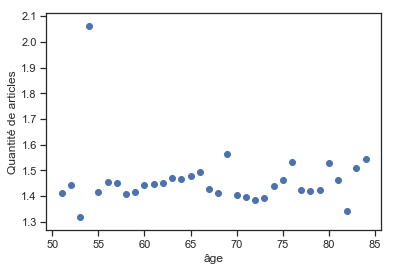

In [146]:
# plot de la relation ente l'âge des clients et la quantité d'articles par panier

x =df_plus_50['âge']
y = df_plus_50['id_prod']


b =plt.scatter(x, y,  alpha=1)
plt.xlabel('âge')
plt.ylabel("Quantité de articles")
plt.show()
i=b.get_figure()
i.savefig('panier_art_age_plus_50')

In [147]:
pg.corr(df_plus_50['âge'],df_plus_50['id_prod'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,34,-0.091,"[-0.42, 0.26]",0.008,-0.056,0.609509,0.242,0.08


In [148]:
df_plus_50['group'] = '2'
del df_plus_50['âge']
df_plus_50

/Volumes/MarceloHD1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id_prod,group
33,1.411400,2
34,1.444275,2
35,1.319378,2
36,2.060263,2
37,1.416781,2
38,1.454392,2
39,1.450018,2
40,1.408502,2
41,1.415609,2
42,1.443812,2


In [149]:
result = pd.concat([df_moins_30, df_plus_30_moins_50, df_plus_50], axis=0, sort=False)
result

,id_prod,group
0,1.757054,0
1,1.724901,0
2,1.742947,0
3,1.732310,0
4,1.843220,0
5,1.539101,0
6,1.738745,0
7,1.858179,0
8,1.714036,0
9,1.789575,0


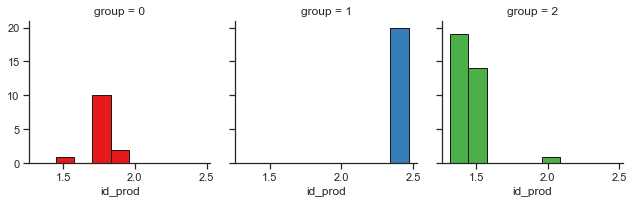

In [159]:
bins = np.linspace(result.id_prod.min(), result.id_prod.max(), 10)
g = sns.FacetGrid(result,col ='group', hue="group", palette="Set1")
g.map(plt.hist, 'id_prod', bins=bins, ec="k")

plt.show()
g.savefig('plot_group_q_art')

In [154]:
# Calcule ANOVA
aov = pg.anova(dv='id_prod', between='group', data=result)
# Print  ANOVA 
pg.print_table(aov)


ANOVA SUMMARY

Source      ddof1    ddof2        F    p-unc    np2
--------  -------  -------  -------  -------  -----
group           2       64  671.872    0.000  0.955



In [155]:
results = ols('id_prod ~ C(group)', data=result).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                id_prod   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     671.9
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           1.11e-43
Time:                        13:44:05   Log-Likelihood:                 65.984
No. Observations:                  67   AIC:                            -126.0
Df Residuals:                      64   BIC:                            -119.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7489      0.026     68.194      0.000       1.698       1.800
C(group)[T.1]     0.6664      0.033     20.227      0.000       0.601       0.732
C(group)[T.2]    -0.2869      0.030     -9.516      0.000      -0.347      -0.227
==============================================================================
Omnibus:                       94.984   Durbin-Watson:                   2.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2127.857
Skew:                           4.094   Prob(JB):                         0.00
Kurtosis:                      29.366   Cond. No.                         4.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Ici on observe une hausse de la quantite des articles par panier dans la tranche d'age de 30 à 50 ans.
* Dans l'ensemble r est egal à -0,552 (plus proche d'un que de zero) ces deux variables ont une correlation moyenne et negative.
* Mais quand regarde les groupes d'âge séparément on voit qu'il n'y a pas de corrélation et car le p-valeur dépasse toujours notre seuil de signification de 0.05
* Avant de rejeter ou garder H0 on regarde le scatterplot.


###### Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat (ie. nombre d'achats par mois par exemple)?

* H0 = Les variables ne sont pas correlées, alors r = 0.
* H1 = Les variables sont correlées, alors r > 0.
* Les variables 'âge' et 'fréquence d’achat' sont des variables quantitatives donc on utilise le coefficient de corrélation de Pearson (r) et la p-valeur pour confirmer où pas l'hypothèses du départ.

In [150]:
# On calcule la frequence d'achats en relation à l'age du client
df_panier_age_freq = df.groupby(['âge']).count().reset_index()
n = df_panier_age_freq.session_id.sum()
df_panier_age_freq['freq_achat'] = df_panier_age_freq['session_id']/n
df_panier_age_freq.drop(['birth','price', 'client_id','sex','id_prod', 'session_id','categ','date', 'heure'], axis = 1, inplace = True)
df_panier_age_freq.head(10)

,âge,freq_achat
0,18,0.021938
1,19,0.006514
2,20,0.006640
3,21,0.006067
4,22,0.006494
5,23,0.014925
6,24,0.007034
7,25,0.006885
8,26,0.008786
9,27,0.008303


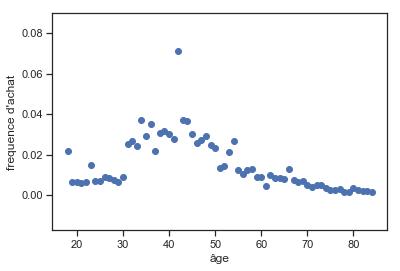

In [151]:
# plot de la relation ente l'age des clients et la frequence d'achats

x =df_panier_age_freq['âge']
y = df_panier_age_freq['freq_achat']


b =plt.scatter(x, y, alpha=1)
plt.xlabel('âge')
plt.ylabel("frequence d'achat")
plt.show()
i=b.get_figure()
i.savefig('panier_age_freq')

In [152]:
# calcule du coefficient de corrélation de Pearson
coef_corr_pearson = st.pearsonr(df_panier_age_freq['âge'],df_panier_age_freq['freq_achat'])[0]
print(coef_corr_pearson)
p_value = st.pearsonr(df_panier_age_freq['âge'],df_panier_age_freq['freq_achat'])[1]
print(p_value)

-0.4250077669949114
0.0003371503899460556


In [153]:
pg.corr(df_panier_age_freq['âge'],df_panier_age_freq['freq_achat'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,67,-0.425,"[-0.6, -0.21]",0.181,0.155,0.000337,82.03,0.955


* On observe que plus les consommateurs sont âgés plus la fréquence de leurs achats est faible avec une hausse de la fréquence dans la tranche d'âge de 30 à 50 ans.
* r est egal à -0,4, ces deux variables ont une faible corrélation  negative.
* On garde H1 (p-value = 0,0)

#### Fin de la mission 3

##### Conclusions : 


* Le genre des clients n'est pas déterminant par rapport à leur comportament d'achats. 
* Par contre l'âge des clients est déterminant par rapport au montant du panier, leur fréquence d'achats et la quantité d'articles.
* Par rapport au catégorie de produits : 

     Les produits de catégorie 2 sont achetés presque exclusivement pour les clients de 15 à 30 ans
     
     Les produits de catégorie 1 sont achetés de forme homogène pour toutes âges de clients
     
     les produits de catégorie 0 sont achetés en principalement par les clientes de 30 à 50 ans
